In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../ssd_data/final_data/final_data_MA2.csv',index_col=False)

# 데이터를 시간 순서대로 정렬 ('ds' 컬럼을 기준으로)
data = data.sort_values(by='ds')
data

,disk_id,ds,n_5,r_5,r_9,r_12,n_170,n_171,r_171,n_172,...,r_194,r_197,r_199,n_233,r_241,r_242,n_175,r_175,n_232,label
0,4476,2019-01-01,100.0,0.0,31975.0,20.0,100.0,100.0,0.0,100.0,...,26.0,0.0,0.0,90.0,4531745.0,2105874.0,100.0,8.122004e+11,100.0,0
8098,43237,2019-01-01,100.0,0.0,28061.0,10.0,100.0,100.0,0.0,100.0,...,27.0,0.0,0.0,83.0,7236527.0,1105495.0,100.0,7.215561e+11,100.0,0
7923,109655,2019-01-01,100.0,0.0,37373.0,11.0,100.0,100.0,0.0,100.0,...,25.0,0.0,0.0,96.0,2432564.0,2598131.0,100.0,9.536919e+11,100.0,0
537,112153,2019-01-01,100.0,0.0,21931.0,13.0,100.0,100.0,0.0,100.0,...,27.0,0.0,0.0,41.0,22952741.0,8548880.0,100.0,5.626663e+11,100.0,0
7744,33077,2019-01-01,100.0,2.0,28746.0,36.0,99.0,100.0,1.0,100.0,...,28.0,0.0,520.0,79.0,6093053.0,9969445.0,100.0,7.304924e+11,99.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,115686,2019-06-30,100.0,0.0,32153.0,20.0,100.0,100.0,0.0,100.0,...,28.0,0.0,0.0,98.0,71363.0,93148.0,100.0,8.205413e+11,100.0,0
179,4476,2019-06-30,100.0,0.0,36275.0,20.0,100.0,100.0,0.0,100.0,...,27.0,0.0,0.0,88.0,5600806.0,2699179.0,100.0,9.236028e+11,100.0,0
10118,3548,2019-06-30,100.0,0.0,35704.0,25.0,100.0,100.0,0.0,100.0,...,36.0,0.0,0.0,79.0,5443074.0,10240034.0,100.0,8.979344e+11,100.0,0
3851,19792,2019-06-30,100.0,0.0,33569.0,13.0,100.0,100.0,0.0,100.0,...,24.0,0.0,0.0,89.0,4217199.0,223129.0,100.0,8.507037e+11,100.0,0


In [4]:
# 70% 지점의 인덱스를 찾아 훈련 및 테스트 데이터로 분할
index_70_percent = int(len(data) * 0.7)
cutoff_date = data.iloc[index_70_percent]['ds']

# cutoff_date 이전의 데이터는 train_data로, 이후 데이터는 test_data로 분할
train_data = data[data['ds'] <= cutoff_date]
test_data = data[data['ds'] > cutoff_date]

In [5]:
cutoff_date

'2019-04-28'

In [6]:
X_train = train_data.drop(['disk_id','ds','label'],axis=1)
y_train = train_data['label']
X_test = test_data.drop(['disk_id','ds','label'],axis=1)
y_test = test_data['label']

In [7]:
X_train

,n_5,r_5,r_9,r_12,n_170,n_171,r_171,n_172,r_172,r_174,...,r_192,r_194,r_197,r_199,n_233,r_241,r_242,n_175,r_175,n_232
0,100.0,0.0,31975.0,20.0,100.0,100.0,0.0,100.0,0.0,10.0,...,10.0,26.0,0.0,0.0,90.0,4531745.0,2105874.0,100.0,8.122004e+11,100.0
8098,100.0,0.0,28061.0,10.0,100.0,100.0,0.0,100.0,0.0,7.0,...,7.0,27.0,0.0,0.0,83.0,7236527.0,1105495.0,100.0,7.215561e+11,100.0
7923,100.0,0.0,37373.0,11.0,100.0,100.0,0.0,100.0,0.0,8.0,...,8.0,25.0,0.0,0.0,96.0,2432564.0,2598131.0,100.0,9.536919e+11,100.0
537,100.0,0.0,21931.0,13.0,100.0,100.0,0.0,100.0,0.0,9.0,...,9.0,27.0,0.0,0.0,41.0,22952741.0,8548880.0,100.0,5.626663e+11,100.0
7744,100.0,2.0,28746.0,36.0,99.0,100.0,1.0,100.0,0.0,32.0,...,32.0,28.0,0.0,520.0,79.0,6093053.0,9969445.0,100.0,7.304924e+11,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,100.0,0.0,33941.0,12.0,100.0,100.0,0.0,100.0,0.0,9.0,...,9.0,26.0,0.0,0.0,1.0,26002001.0,2481037.0,100.0,8.677769e+11,100.0
11318,100.0,0.0,42123.0,20.0,100.0,100.0,0.0,100.0,0.0,18.0,...,18.0,25.0,0.0,0.0,92.0,1980049.0,160120.0,100.0,1.074373e+12,100.0
11527,100.0,0.0,31716.0,19.0,100.0,100.0,0.0,100.0,0.0,16.0,...,16.0,28.0,0.0,159.0,94.0,1769384.0,4526640.0,100.0,7.993698e+11,100.0
6945,100.0,0.0,32605.0,14.0,100.0,100.0,0.0,100.0,0.0,5.0,...,5.0,25.0,0.0,24.0,72.0,9093699.0,6936630.0,1.0,8.332263e+11,100.0


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

y_pred = clf.predict(X_test_scaled)
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")
print(f"Macro_f1_score : {f1_score(y_test, y_pred,average='macro')}")
print(f"Precision : {precision_score(y_test, y_pred)}")
print(f"Recall : {recall_score(y_test, y_pred)}")

Accuracy : 0.9754744525547445
Macro_f1_score : 0.6604203846916519
Precision : 1.0
Recall : 0.2


In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


print(cm)

[[3320    0]
 [  84   21]]


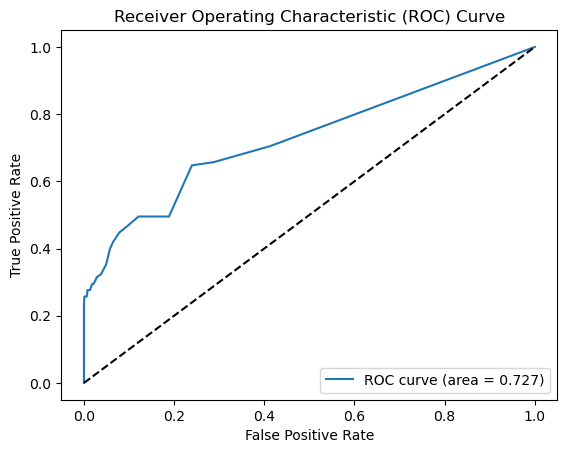

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = clf.predict_proba(X_test_scaled)[:, 1]

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC 커브를 그리기 위한 점들을 출력합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 기준선 (diagonal)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

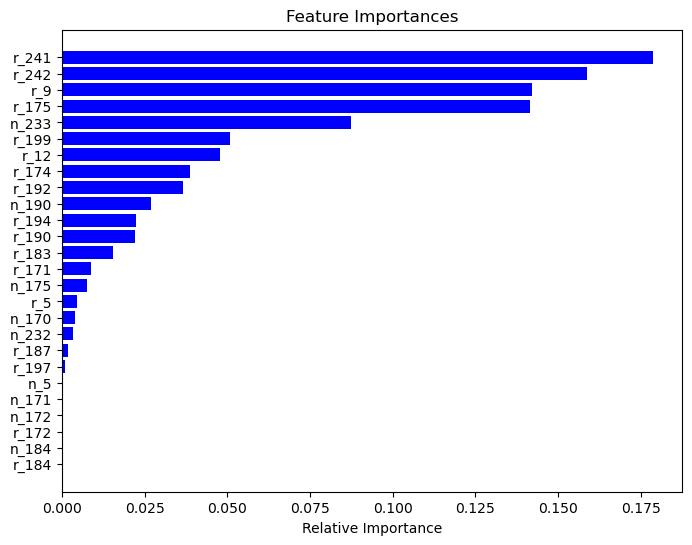

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도
feature_importances = clf.feature_importances_

# 특성 중요도를 내림차순으로 정렬
indices = np.argsort(feature_importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## pycaret

In [14]:
import pandas as pd
from pycaret.classification import *

# 예시 데이터 (시계열 데이터 프레임)

# 데이터를 시간 순서대로 정렬 ('ds' 컬럼을 기준으로)
data = data.sort_values(by='ds')

# 70% 지점의 인덱스를 찾아 훈련 및 테스트 데이터로 분할
index_70_percent = int(len(data) * 0.7)
cutoff_date = data.iloc[index_70_percent]['ds']

# cutoff_date 이전의 데이터는 train_data로, 이후 데이터는 test_data로 분할
train_data = data[data['ds'] <= cutoff_date]
test_data = data[data['ds'] > cutoff_date]

# PyCaret 설정 초기화
# train_data: 사용할 훈련 데이터프레임
# target: 예측하고자 하는 컬럼 이름 (이진 분류의 목표 변수)
s = setup(data=train_data, target='label',fold=5, session_id=123,normalize=True,normalize_method='minmax')

# 모델 비교
# 모든 사용 가능한 모델을 훈련시키고 성능을 비교합니다.
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(8165, 29)"
4,Transformed data shape,"(8165, 29)"
5,Transformed train set shape,"(5715, 29)"
6,Transformed test set shape,"(2450, 29)"
7,Numeric features,27
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9885,0.9985,0.9085,0.9579,0.9325,0.9262,0.9266,0.3800
dt,Decision Tree Classifier,0.9864,0.9486,0.9027,0.9402,0.9203,0.9129,0.9135,0.1940
lightgbm,Light Gradient Boosting Machine,0.9858,0.9931,0.8629,0.9732,0.9146,0.9069,0.9089,0.3660
et,Extra Trees Classifier,0.9844,0.9972,0.8806,0.9385,0.9085,0.9000,0.9006,0.3600
gbc,Gradient Boosting Classifier,0.9648,0.9825,0.6299,0.9543,0.7567,0.7388,0.7584,0.5320
ada,Ada Boost Classifier,0.9298,0.9134,0.2941,0.7602,0.4231,0.3936,0.4449,0.3200
knn,K Neighbors Classifier,0.9293,0.9085,0.4712,0.6338,0.5385,0.5013,0.5088,0.7240
dummy,Dummy Classifier,0.9120,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2200
svm,SVM - Linear Kernel,0.9118,0.0000,0.0000,0.0000,0.0000,-0.0003,-0.0018,0.1640
ridge,Ridge Classifier,0.9116,0.0000,0.0000,0.0000,0.0000,-0.0007,-0.0037,0.1540


In [15]:
# 특정 모델 선택 및 훈련
model = create_model('rf')

# 모델 성능 평가 (테스트 데이터로)
predict_model(model, data=test_data)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:49:46
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9878,0.9979,0.9000,0.9574,0.9278,0.9211,0.9217
1,0.9843,0.9982,0.8800,0.9362,0.9072,0.8986,0.8991
2,0.9869,0.9981,0.8911,0.9574,0.9231,0.9159,0.9166
3,0.9939,0.9996,0.9505,0.9796,0.9648,0.9615,0.9616
4,0.9895,0.9988,0.9208,0.9588,0.9394,0.9336,0.9339
Mean,0.9885,0.9985,0.9085,0.9579,0.9325,0.9262,0.9266
Std,0.0032,0.0006,0.0249,0.0137,0.0192,0.0209,0.0208


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9702,0.6604,0.0286,1.0000,0.0556,0.0539,0.1665


,disk_id,ds,n_5,r_5,r_9,r_12,n_170,n_171,r_171,n_172,...,r_199,n_233,r_241,r_242,n_175,r_175,n_232,label,prediction_label,prediction_score
475,22620,2019-04-29,100.0,0.0,30784.0,7.0,100.0,100.0,0.0,100.0,...,0.0,54.0,18056496.0,32079496.0,100.0,7.862520e+11,100.0,0,0,0.98
699,22659,2019-04-29,100.0,0.0,32432.0,25.0,100.0,100.0,0.0,100.0,...,3.0,80.0,5417344.0,13343200.0,1.0,8.165105e+11,100.0,0,0,0.98
10959,30581,2019-04-29,100.0,0.0,32514.0,14.0,100.0,100.0,0.0,100.0,...,0.0,81.0,6498276.0,932129.0,100.0,8.333589e+11,100.0,0,0,0.99
2607,80345,2019-04-29,100.0,0.0,27869.0,13.0,100.0,100.0,0.0,100.0,...,0.0,97.0,1064649.0,15384.0,100.0,7.090818e+11,100.0,0,0,1.00
1819,115686,2019-04-29,100.0,0.0,30673.0,20.0,100.0,100.0,0.0,100.0,...,0.0,98.0,71363.0,93148.0,100.0,7.820102e+11,100.0,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,918,2019-06-30,100.0,0.0,33150.0,22.0,100.0,100.0,0.0,100.0,...,0.0,82.0,5675654.0,1942245.0,100.0,8.418462e+11,100.0,0,0,0.99
9115,28248,2019-06-30,100.0,0.0,35339.0,21.0,100.0,100.0,0.0,100.0,...,0.0,99.0,140298.0,5053724.0,100.0,9.063818e+11,100.0,0,0,0.99
10657,60438,2019-06-30,100.0,0.0,33065.0,23.0,100.0,100.0,0.0,100.0,...,0.0,91.0,4268979.0,2072669.0,100.0,8.290822e+11,100.0,0,0,0.99
10477,57148,2019-06-30,100.0,4.0,34561.0,10.0,99.0,100.0,5.0,100.0,...,0.0,86.0,4739332.0,55586.0,100.0,8.851981e+11,99.0,0,0,0.61


In [17]:
tuned_model = tune_model(model)
tuned_model

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:20:54
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
# 모델 성능 평가 (테스트 데이터로)
predict_model(tuned_model, data=test_data,)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9737,0.8814,0.5204,0.4562,0.4862,0.4727,0.4738


,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,...,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label,prediction_label,prediction_score
18176,5288,2019-05-05,4.294967e+09,98.0,0.0,43254.0,46.0,100.0,0.0,100.0,...,100.0,0.0,0.0,0.0,0.0,100.0,1.086862e+12,0,0,1.00
61170,15511,2019-05-05,4.294967e+09,95.0,0.0,47601.0,39.0,100.0,0.0,100.0,...,100.0,0.0,0.0,0.0,0.0,100.0,1.202794e+12,0,0,1.00
60014,23071,2019-05-05,4.294967e+09,54.0,2031.0,49507.0,32.0,100.0,0.0,100.0,...,65.0,2031.0,2.0,0.0,0.0,100.0,1.254648e+12,0,0,0.99
43872,24148,2019-05-05,4.294967e+09,94.0,0.0,49465.0,38.0,100.0,0.0,100.0,...,100.0,0.0,0.0,0.0,0.0,100.0,1.254687e+12,0,0,0.93
7252,11936,2019-05-05,4.294967e+09,97.0,0.0,43380.0,36.0,100.0,0.0,100.0,...,100.0,0.0,0.0,0.0,0.0,100.0,1.095480e+12,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64690,42173,2019-06-30,4.294967e+09,97.0,0.0,50421.0,47.0,100.0,0.0,100.0,...,100.0,0.0,0.0,0.0,0.0,100.0,1.267203e+12,0,0,0.98
68444,5888,2019-06-30,4.294967e+09,98.0,0.0,44234.0,79.0,100.0,0.0,100.0,...,100.0,0.0,0.0,0.0,0.0,100.0,1.104198e+12,0,0,0.98
7987,32191,2019-06-30,4.294967e+09,98.0,0.0,41561.0,34.0,100.0,0.0,100.0,...,100.0,0.0,0.0,0.0,0.0,100.0,1.048310e+12,0,0,0.99
37982,25604,2019-06-30,4.294967e+09,97.0,0.0,48855.0,32.0,100.0,0.0,100.0,...,100.0,0.0,0.0,0.0,0.0,100.0,1.233221e+12,0,0,0.97


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from datetime import date, timedelta
from pycaret import time_series as ts
from pycaret.time_series import TSForecastingExperiment
import refinitiv.data as rd
from os.path import exists


exp = TSForecastingExperiment()

exp.setup(data=train_data, target='label', fh=60, fold=5, session_id=123)



In [ ]:
exp.models()

## 5 window(미완성..)

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# 데이터 프레임 예시 (shuffled_df 라는 데이터 프레임이 있다고 가정)
# shuffled_df = pd.DataFrame(...)

# model과 disk_id별로 unique한 그룹을 찾습니다.
grouped = shuffled_df.groupby(['model', 'disk_id'])

# lag window size
window_size = 5

# 결과를 저장할 빈 데이터프레임을 만듭니다.
result = pd.DataFrame()

# tqdm을 사용하여 진행 상태를 표시합니다.
for name, group in tqdm(grouped, desc="Processing groups"):
    # 변수들에 대한 lag feature를 생성합니다. (4번째부터 마지막에서 두 번째 열까지)
    features = group.iloc[:, 3:-1].values
    labels = group.iloc[:, -1].values
    dates = group.iloc[:, 1].values
    lag_features = []
    lag_labels = []
    lag_dates = []
    
    # window를 이동시키며 lag feature를 만듭니다.
    for i in range(len(features) - window_size + 1):
        window = features[i:i + window_size].flatten()
        lag_features.append(window)
        lag_labels.append(labels[i + window_size - 1])
        lag_dates.append(dates[i + window_size - 1])
    
    # 데이터프레임 형태로 변환합니다.
    num_features = len(group.columns) - 4
    columns = [f'var_{j}_lag_{i}' for j in range(1, num_features+1) for i in range(1, window_size+1)]
    lag_df = pd.DataFrame(lag_features, columns=columns)
    
    # 기존 정보를 포함시킵니다.
    lag_df['model'] = name[0]
    lag_df['disk_id'] = name[1]
    lag_df['date'] = lag_dates  # 날짜를 추가합니다.
    
    # Label을 추가합니다.
    lag_df['label'] = lag_labels
    
    # 결과 데이터프레임에 추가합니다.
    result = pd.concat([result, lag_df])

# 결과를 출력합니다.
print(result)

In [81]:
grouped = data.groupby(['disk_id'])

window_5_df = pd.DataFrame()

window_size = 5
for name,disk in tqdm(grouped):
    
    window_5_df['disk_id'] = disk['disk_id']
    window_5_df['ds']= disk['ds']
    window_5_df['label'] = disk['label']

    for i in range(window_size-1,-1,-1):
        for column in features.columns:
            window_5_df[f'{column}_t_{i}'] = features[column].shift(-i)
        


window_5_df

  0%|          | 0/548 [00:00<?, ?it/s]

100%|██████████| 548/548 [00:22<00:00, 24.35it/s]


,disk_id,ds,label,r_1_t_4,n_5_t_4,r_5_t_4,r_9_t_4,r_12_t_4,n_171_t_4,r_171_t_4,...,r_190_t_0,r_194_t_0,r_195_t_0,n_196_t_0,r_196_t_0,r_197_t_0,r_198_t_0,r_199_t_0,n_175_t_0,r_175_t_0
21031,NaN,NaT,NaN,4.294967e+09,93.0,2.0,46475.0,146.0,100.0,1.0,...,0.0,16.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,9.627019e+11
21032,NaN,NaT,NaN,4.294967e+09,96.0,0.0,40980.0,29.0,100.0,0.0,...,0.0,16.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,9.664302e+11
21033,NaN,NaT,NaN,4.294967e+09,97.0,0.0,42683.0,34.0,100.0,0.0,...,0.0,16.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,9.665241e+11
21034,NaN,NaT,NaN,4.294967e+09,97.0,0.0,40492.0,36.0,100.0,0.0,...,0.0,16.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,9.666179e+11
21035,NaN,NaT,NaN,4.294967e+09,93.0,0.0,46454.0,34.0,100.0,0.0,...,0.0,16.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,9.667118e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21206,NaN,NaT,NaN,4.294967e+09,57.0,2037.0,45807.0,34.0,100.0,0.0,...,0.0,16.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,1.070086e+12
21207,NaN,NaT,NaN,4.294967e+09,93.0,6.0,50944.0,47.0,100.0,12.0,...,0.0,16.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,1.073815e+12
21208,NaN,NaT,NaN,1.750761e+08,98.0,3.0,39806.0,50.0,100.0,4.0,...,0.0,16.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,1.073909e+12
21209,NaN,NaT,NaN,4.294967e+09,97.0,0.0,42603.0,0.0,0.0,0.0,...,0.0,16.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,1.074002e+12


In [64]:
for i in range(0,window_size,-1):
    for column in features.columns:
        window_5_df[f'{column}_t_{i}'] = features[column].shift(-i)
window_5_df

,disk_id,ds,label
21031,NaN,NaT,NaN
21032,NaN,NaT,NaN
21033,NaN,NaT,NaN
21034,NaN,NaT,NaN
21035,NaN,NaT,NaN
...,...,...,...
21206,NaN,NaT,NaN
21207,NaN,NaT,NaN
21208,NaN,NaT,NaN
21209,NaN,NaT,NaN


In [77]:
window_5_df = pd.DataFrame()
for i in range(window_size-1,-1,-1):
    for column in features.columns:
        window_5_df[f'{column}_t_{i}'] = features[column].shift(-i)
window_5_df

,r_1_t_4,n_5_t_4,r_5_t_4,r_9_t_4,r_12_t_4,n_171_t_4,r_171_t_4,n_172_t_4,r_172_t_4,n_173_t_4,...,r_190_t_0,r_194_t_0,r_195_t_0,n_196_t_0,r_196_t_0,r_197_t_0,r_198_t_0,r_199_t_0,n_175_t_0,r_175_t_0
0,4.294967e+09,96.0,0.0,43946.0,39.0,100.0,0.0,100.0,0.0,8.0,...,12.0,12.0,7.571336e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.030799e+12
27882,4.294967e+09,98.0,0.0,40646.0,36.0,100.0,0.0,100.0,0.0,76.0,...,0.0,11.0,0.000000e+00,100.0,0.0,0.0,0.0,0.0,100.0,9.711676e+11
50690,4.294967e+09,94.0,0.0,46787.0,26.0,100.0,0.0,100.0,0.0,30.0,...,21.0,21.0,7.766713e+08,65.0,2044.0,2.0,0.0,0.0,100.0,1.027106e+12
64029,4.294967e+09,98.0,0.0,36378.0,60.0,100.0,0.0,100.0,0.0,56.0,...,17.0,17.0,2.268835e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.189751e+12
2679,4.294967e+09,96.0,0.0,38057.0,0.0,0.0,0.0,0.0,0.0,1.0,...,19.0,19.0,1.231659e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.099740e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66317,4.294967e+09,96.0,0.0,13320.0,0.0,0.0,0.0,0.0,0.0,46.0,...,15.0,15.0,7.830364e+08,100.0,0.0,0.0,0.0,0.0,1.0,1.069647e+12
2857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,1.263533e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.207103e+12
57586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,17.0,1.832518e+09,99.0,1.0,0.0,0.0,0.0,100.0,1.297252e+12
57758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,12.0,1.105051e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.048451e+12


In [5]:
data

,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
0,12421,2019-01-01,4.294967e+09,98.0,0.0,40821.0,38.0,100.0,0.0,100.0,...,12.0,7.571336e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.030799e+12,0
47319,28267,2019-01-01,4.294967e+09,95.0,0.0,46339.0,41.0,100.0,0.0,100.0,...,14.0,2.202509e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.159917e+12,0
19172,28724,2019-01-01,4.294967e+09,97.0,0.0,38319.0,0.0,0.0,0.0,0.0,...,19.0,0.000000e+00,100.0,0.0,0.0,0.0,0.0,100.0,9.664348e+11,0
45132,878,2019-01-01,4.294967e+09,98.0,0.0,38493.0,0.0,0.0,0.0,0.0,...,17.0,0.000000e+00,100.0,0.0,0.0,0.0,0.0,100.0,9.797615e+11,0
60794,19784,2019-01-01,4.294967e+09,98.0,0.0,40219.0,42.0,100.0,0.0,100.0,...,12.0,4.728696e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.013953e+12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37128,30255,2019-06-30,4.294967e+09,97.0,0.0,39148.0,25.0,100.0,0.0,100.0,...,14.0,2.300419e+06,100.0,0.0,0.0,0.0,0.0,100.0,1.000986e+12,0
7343,35334,2019-06-30,4.294967e+09,97.0,0.0,48796.0,40.0,100.0,0.0,100.0,...,21.0,1.263464e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.237200e+12,0
73351,7224,2019-06-30,4.294967e+09,97.0,0.0,42842.0,0.0,0.0,0.0,0.0,...,14.0,0.000000e+00,100.0,0.0,0.0,0.0,0.0,100.0,1.082639e+12,0
27585,22839,2019-06-30,4.294967e+09,98.0,0.0,44740.0,74.0,100.0,0.0,100.0,...,14.0,7.795195e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.117107e+12,0


In [11]:
data

,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
0,12421,2019-01-01,4.294967e+09,98.0,0.0,40821.0,38.0,100.0,0.0,100.0,...,12.0,7.571336e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.030799e+12,0
47319,28267,2019-01-01,4.294967e+09,95.0,0.0,46339.0,41.0,100.0,0.0,100.0,...,14.0,2.202509e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.159917e+12,0
19172,28724,2019-01-01,4.294967e+09,97.0,0.0,38319.0,0.0,0.0,0.0,0.0,...,19.0,0.000000e+00,100.0,0.0,0.0,0.0,0.0,100.0,9.664348e+11,0
45132,878,2019-01-01,4.294967e+09,98.0,0.0,38493.0,0.0,0.0,0.0,0.0,...,17.0,0.000000e+00,100.0,0.0,0.0,0.0,0.0,100.0,9.797615e+11,0
60794,19784,2019-01-01,4.294967e+09,98.0,0.0,40219.0,42.0,100.0,0.0,100.0,...,12.0,4.728696e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.013953e+12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37128,30255,2019-06-30,4.294967e+09,97.0,0.0,39148.0,25.0,100.0,0.0,100.0,...,14.0,2.300419e+06,100.0,0.0,0.0,0.0,0.0,100.0,1.000986e+12,0
7343,35334,2019-06-30,4.294967e+09,97.0,0.0,48796.0,40.0,100.0,0.0,100.0,...,21.0,1.263464e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.237200e+12,0
73351,7224,2019-06-30,4.294967e+09,97.0,0.0,42842.0,0.0,0.0,0.0,0.0,...,14.0,0.000000e+00,100.0,0.0,0.0,0.0,0.0,100.0,1.082639e+12,0
27585,22839,2019-06-30,4.294967e+09,98.0,0.0,44740.0,74.0,100.0,0.0,100.0,...,14.0,7.795195e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.117107e+12,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state=42,class_weight='balanced')
clf.fit(X_train_scaled,y_train)